In [38]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from scipy import stats
from scipy.stats import randint 
from scipy.stats import uniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [39]:
dataset = pd.read_excel('Eye_measurements_may_2020.xls')
dataset.shape

(57271, 18)

In [40]:
dataset.head(10)

,Externe ID,Geslacht,Geboortedatum,Oogmetingen/Datum,Oogmetingen/Sfr ver,Oogmetingen/Cyl ver,Oogmetingen/As ver,Oogmetingen/Add,Oogmetingen/Sfr dicht,Oogmetingen/Cyl dicht,Oogmetingen/As dicht,Oogmetingen/Sfr ver.1,Oogmetingen/Cyl ver.1,Oogmetingen/As ver.1,Oogmetingen/Add.1,Oogmetingen/Sfr dicht.1,Oogmetingen/Cyl dicht.1,Oogmetingen/As dicht.1
0,__export__.res_partner_10972_f0a5feb4,Vrouw,1962-07-24 00:00:00,2020-05-18 00:00:00,-1.25,-0.50,145.0,NaN,NaN,-1.0,145.0,-0.75,-1.00,20.0,NaN,NaN,-0.50,20.0
1,NaN,NaN,NaN,2017-12-27 00:00:00,-1.25,-0.50,155.0,0.0,0.00,0.0,0.0,-0.75,-0.50,20.0,0.0,0.00,0.00,0.0
2,NaN,NaN,NaN,2012-02-11 00:00:00,-1.00,-0.50,155.0,0.0,0.00,0.0,0.0,-0.50,-0.50,20.0,0.0,0.00,0.00,0.0
3,__export__.res_partner_7722_2342b746,Man,1982-07-10 00:00:00,2020-05-16 00:00:00,-2.00,-1.50,90.0,NaN,NaN,NaN,NaN,-1.50,-1.50,90.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2008-12-13 00:00:00,-1.25,-0.75,85.0,0.0,0.00,0.0,0.0,-1.25,-0.75,90.0,0.0,0.00,0.00,0.0
5,NaN,NaN,NaN,2001-04-06 00:00:00,-1.00,-0.50,80.0,0.0,0.00,0.0,0.0,-1.00,-0.50,80.0,0.0,0.00,0.00,0.0
6,NaN,NaN,NaN,1998-05-06 00:00:00,-0.25,-0.50,80.0,0.0,0.00,0.0,0.0,-0.50,-0.50,80.0,0.0,0.00,0.00,0.0
7,__export__.res_partner_12291_d15d7cb3,Vrouw,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,__export__.res_partner_10292_fd17c1d1,False,NaN,2019-08-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,__export__.res_partner_4452_c8f47e75,Vrouw,1950-03-18 00:00:00,2020-05-16 00:00:00,2.25,0.75,90.0,3.0,5.25,1.0,90.0,2.75,1.00,95.0,3.0,5.75,0.75,95.0


In [41]:
dataset.describe()

,Oogmetingen/Sfr ver,Oogmetingen/Cyl ver,Oogmetingen/As ver,Oogmetingen/Add,Oogmetingen/Sfr dicht,Oogmetingen/Cyl dicht,Oogmetingen/As dicht,Oogmetingen/Sfr ver.1,Oogmetingen/Cyl ver.1,Oogmetingen/As ver.1,Oogmetingen/Add.1,Oogmetingen/Sfr dicht.1,Oogmetingen/Cyl dicht.1,Oogmetingen/As dicht.1
count,50356.000000,43568.000000,42976.000000,40472.000000,44339.000000,39561.000000,39075.000000,50360.000000,43702.00000,43075.000000,40491.000000,44317.000000,39441.000000,39206.000000
mean,2.765439,-0.354182,55.102755,0.867794,1.726021,-0.187148,31.227306,2.097781,-0.35763,52.332583,0.869079,1.663371,-0.179933,29.981508
std,54.575393,0.875910,65.318330,1.155827,7.050081,0.633139,63.063962,48.432780,0.88656,63.270807,1.156213,2.181330,0.775574,53.198178
min,-26.000000,-7.000000,0.000000,-0.750000,-22.000000,-8.000000,0.000000,-27.750000,-8.00000,0.000000,-0.750000,-23.500000,-6.500000,0.000000
25%,-1.500000,-0.750000,0.000000,0.000000,0.000000,-0.250000,0.000000,-1.500000,-0.75000,0.000000,0.000000,0.000000,-0.250000,0.000000
50%,0.000000,0.000000,10.000000,0.000000,1.250000,0.000000,0.000000,0.000000,0.00000,10.000000,0.000000,1.250000,0.000000,0.000000
75%,1.250000,0.000000,90.000000,2.250000,3.250000,0.000000,65.000000,1.250000,0.00000,90.000000,2.250000,3.250000,0.000000,55.000000
max,999.990000,6.000000,180.000000,8.500000,999.990000,20.000000,6280.000000,999.990000,20.00000,180.000000,6.250000,27.250000,90.000000,225.000000


In [42]:
dataset.median()

Oogmetingen/Sfr ver         0.00
Oogmetingen/Cyl ver         0.00
Oogmetingen/As ver         10.00
Oogmetingen/Add             0.00
Oogmetingen/Sfr dicht       1.25
Oogmetingen/Cyl dicht       0.00
Oogmetingen/As dicht        0.00
Oogmetingen/Sfr ver.1       0.00
Oogmetingen/Cyl ver.1       0.00
Oogmetingen/As ver.1       10.00
Oogmetingen/Add.1           0.00
Oogmetingen/Sfr dicht.1     1.25
Oogmetingen/Cyl dicht.1     0.00
Oogmetingen/As dicht.1      0.00
dtype: float64

In [43]:
# #Fill NaN with 0
# values = {'Oogmetingen/Sfr ver': 0, 'Oogmetingen/Cyl ver': 0, 'Oogmetingen/As ver':0 ,'Oogmetingen/Add':0,'Oogmetingen/Sfr dicht':0,'Oogmetingen/Cyl dicht':0,'Oogmetingen/As dicht':0,'Oogmetingen/Sfr ver.1':0,'Oogmetingen/Cyl ver.1':0,'Oogmetingen/As ver.1':0,'Oogmetingen/Add.1':0,'Oogmetingen/Sfr dicht.1':0,'Oogmetingen/Cyl dicht.1':0,'Oogmetingen/As dicht.1':0}
# dataset2 = dataset.fillna(value=values)

In [105]:
dataset.describe()

,Oogmetingen/Sfr ver,Oogmetingen/Cyl ver,Oogmetingen/As ver,Oogmetingen/Add,Oogmetingen/Sfr dicht,Oogmetingen/Cyl dicht,Oogmetingen/As dicht,Oogmetingen/Sfr ver.1,Oogmetingen/Cyl ver.1,Oogmetingen/As ver.1,Oogmetingen/Add.1,Oogmetingen/Sfr dicht.1,Oogmetingen/Cyl dicht.1,Oogmetingen/As dicht.1
count,50356.000000,43568.000000,42976.000000,40472.000000,44339.000000,39561.000000,39075.000000,50360.000000,43702.00000,43075.000000,40491.000000,44317.000000,39441.000000,39206.000000
mean,2.765439,-0.354182,55.102755,0.867794,1.726021,-0.187148,31.227306,2.097781,-0.35763,52.332583,0.869079,1.663371,-0.179933,29.981508
std,54.575393,0.875910,65.318330,1.155827,7.050081,0.633139,63.063962,48.432780,0.88656,63.270807,1.156213,2.181330,0.775574,53.198178
min,-26.000000,-7.000000,0.000000,-0.750000,-22.000000,-8.000000,0.000000,-27.750000,-8.00000,0.000000,-0.750000,-23.500000,-6.500000,0.000000
25%,-1.500000,-0.750000,0.000000,0.000000,0.000000,-0.250000,0.000000,-1.500000,-0.75000,0.000000,0.000000,0.000000,-0.250000,0.000000
50%,0.000000,0.000000,10.000000,0.000000,1.250000,0.000000,0.000000,0.000000,0.00000,10.000000,0.000000,1.250000,0.000000,0.000000
75%,1.250000,0.000000,90.000000,2.250000,3.250000,0.000000,65.000000,1.250000,0.00000,90.000000,2.250000,3.250000,0.000000,55.000000
max,999.990000,6.000000,180.000000,8.500000,999.990000,20.000000,6280.000000,999.990000,20.00000,180.000000,6.250000,27.250000,90.000000,225.000000


In [44]:
dataset['Oogmetingen/Cyl ver'].median()

0.0

In [45]:
#Fillna with median
values = {'Oogmetingen/Sfr ver': dataset['Oogmetingen/Sfr ver'].median(),
          'Oogmetingen/Cyl ver': dataset['Oogmetingen/Cyl ver'].median(), 
          'Oogmetingen/As ver': dataset['Oogmetingen/As ver'].median() ,
          'Oogmetingen/Add': dataset['Oogmetingen/Add'].median(),
          'Oogmetingen/Sfr dicht': dataset['Oogmetingen/Sfr dicht'].median(),
          'Oogmetingen/Cyl dicht':dataset['Oogmetingen/Cyl dicht'].median(),
          'Oogmetingen/As dicht':dataset['Oogmetingen/As dicht'].median(),
          'Oogmetingen/Sfr ver.1':dataset['Oogmetingen/Sfr ver.1'].median(),
          'Oogmetingen/Cyl ver.1':dataset['Oogmetingen/Cyl ver.1'].median(),
          'Oogmetingen/As ver.1':dataset['Oogmetingen/As ver.1'].median(),
          'Oogmetingen/Add.1':dataset['Oogmetingen/Add.1'].median(),
          'Oogmetingen/Sfr dicht.1':dataset['Oogmetingen/Sfr dicht.1'].median(),
          'Oogmetingen/Cyl dicht.1':dataset['Oogmetingen/Cyl dicht.1'].median(),
          'Oogmetingen/As dicht.1':dataset['Oogmetingen/As dicht.1'].median()}
dataset2 = dataset.fillna(value=values)

In [46]:
# #Dropna in oogmetingen met thresh = 12 dus enkel drop waar meer dan 2 nan waarden zijn
# # dataset2 = dataset.dropna(thresh=12,subset=['Oogmetingen/Sfr ver','Oogmetingen/Cyl ver',
#                                             'Oogmetingen/As ver','Oogmetingen/Add',
#                                             'Oogmetingen/Sfr dicht','Oogmetingen/Cyl dicht',
#                                             'Oogmetingen/As dicht','Oogmetingen/Sfr ver.1',
#                                             'Oogmetingen/Cyl ver.1','Oogmetingen/As ver.1',
#                                             'Oogmetingen/Add.1','Oogmetingen/Sfr dicht.1',
#                                             'Oogmetingen/Cyl dicht.1','Oogmetingen/As dicht.1'])

In [47]:
dataset2.shape

(57271, 18)

In [48]:
dataset2.head(50)

,Externe ID,Geslacht,Geboortedatum,Oogmetingen/Datum,Oogmetingen/Sfr ver,Oogmetingen/Cyl ver,Oogmetingen/As ver,Oogmetingen/Add,Oogmetingen/Sfr dicht,Oogmetingen/Cyl dicht,Oogmetingen/As dicht,Oogmetingen/Sfr ver.1,Oogmetingen/Cyl ver.1,Oogmetingen/As ver.1,Oogmetingen/Add.1,Oogmetingen/Sfr dicht.1,Oogmetingen/Cyl dicht.1,Oogmetingen/As dicht.1
0,__export__.res_partner_10972_f0a5feb4,Vrouw,1962-07-24 00:00:00,2020-05-18 00:00:00,-1.25,-0.50,145.0,0.00,1.25,-1.00,145.0,-0.75,-1.00,20.0,0.00,1.25,-0.50,20.0
1,NaN,NaN,NaN,2017-12-27 00:00:00,-1.25,-0.50,155.0,0.00,0.00,0.00,0.0,-0.75,-0.50,20.0,0.00,0.00,0.00,0.0
2,NaN,NaN,NaN,2012-02-11 00:00:00,-1.00,-0.50,155.0,0.00,0.00,0.00,0.0,-0.50,-0.50,20.0,0.00,0.00,0.00,0.0
3,__export__.res_partner_7722_2342b746,Man,1982-07-10 00:00:00,2020-05-16 00:00:00,-2.00,-1.50,90.0,0.00,1.25,0.00,0.0,-1.50,-1.50,90.0,0.00,1.25,0.00,0.0
4,NaN,NaN,NaN,2008-12-13 00:00:00,-1.25,-0.75,85.0,0.00,0.00,0.00,0.0,-1.25,-0.75,90.0,0.00,0.00,0.00,0.0
5,NaN,NaN,NaN,2001-04-06 00:00:00,-1.00,-0.50,80.0,0.00,0.00,0.00,0.0,-1.00,-0.50,80.0,0.00,0.00,0.00,0.0
6,NaN,NaN,NaN,1998-05-06 00:00:00,-0.25,-0.50,80.0,0.00,0.00,0.00,0.0,-0.50,-0.50,80.0,0.00,0.00,0.00,0.0
7,__export__.res_partner_12291_d15d7cb3,Vrouw,NaN,False,0.00,0.00,10.0,0.00,1.25,0.00,0.0,0.00,0.00,10.0,0.00,1.25,0.00,0.0
8,__export__.res_partner_10292_fd17c1d1,False,NaN,2019-08-10 00:00:00,0.00,0.00,10.0,0.00,1.25,0.00,0.0,0.00,0.00,10.0,0.00,1.25,0.00,0.0
9,__export__.res_partner_4452_c8f47e75,Vrouw,1950-03-18 00:00:00,2020-05-16 00:00:00,2.25,0.75,90.0,3.00,5.25,1.00,90.0,2.75,1.00,95.0,3.00,5.75,0.75,95.0


In [49]:
#forward fill NaN waarden
dataset2 = dataset2.fillna(method='ffill')

dataset2.head(10)

In [50]:
#Maak een id aan door astype op category te zetten en per category een uniek id aan te maken
dataset2['ID'] = dataset2['Externe ID'].astype('category').cat.rename_categories(range(1, dataset2['Externe ID'].nunique()+1))
# dataset2['ID'] = dataset2['Externe ID'].astype('category').cat.rename_categories(range(1, dataset2['Externe ID'].nunique()+1))

In [51]:
dataset2.head()

,Externe ID,Geslacht,Geboortedatum,Oogmetingen/Datum,Oogmetingen/Sfr ver,Oogmetingen/Cyl ver,Oogmetingen/As ver,Oogmetingen/Add,Oogmetingen/Sfr dicht,Oogmetingen/Cyl dicht,Oogmetingen/As dicht,Oogmetingen/Sfr ver.1,Oogmetingen/Cyl ver.1,Oogmetingen/As ver.1,Oogmetingen/Add.1,Oogmetingen/Sfr dicht.1,Oogmetingen/Cyl dicht.1,Oogmetingen/As dicht.1,ID
0,__export__.res_partner_10972_f0a5feb4,Vrouw,1962-07-24 00:00:00,2020-05-18 00:00:00,-1.25,-0.50,145.0,0.0,1.25,-1.0,145.0,-0.75,-1.00,20.0,0.0,1.25,-0.5,20.0,1931
1,__export__.res_partner_10972_f0a5feb4,Vrouw,1962-07-24 00:00:00,2017-12-27 00:00:00,-1.25,-0.50,155.0,0.0,0.00,0.0,0.0,-0.75,-0.50,20.0,0.0,0.00,0.0,0.0,1931
2,__export__.res_partner_10972_f0a5feb4,Vrouw,1962-07-24 00:00:00,2012-02-11 00:00:00,-1.00,-0.50,155.0,0.0,0.00,0.0,0.0,-0.50,-0.50,20.0,0.0,0.00,0.0,0.0,1931
3,__export__.res_partner_7722_2342b746,Man,1982-07-10 00:00:00,2020-05-16 00:00:00,-2.00,-1.50,90.0,0.0,1.25,0.0,0.0,-1.50,-1.50,90.0,0.0,1.25,0.0,0.0,18846
4,__export__.res_partner_7722_2342b746,Man,1982-07-10 00:00:00,2008-12-13 00:00:00,-1.25,-0.75,85.0,0.0,0.00,0.0,0.0,-1.25,-0.75,90.0,0.0,0.00,0.0,0.0,18846


In [52]:
#verwijder het oorspronkelijke id
dataset3 = dataset2.drop(columns=['Externe ID'])
dataset3.head()

,Geslacht,Geboortedatum,Oogmetingen/Datum,Oogmetingen/Sfr ver,Oogmetingen/Cyl ver,Oogmetingen/As ver,Oogmetingen/Add,Oogmetingen/Sfr dicht,Oogmetingen/Cyl dicht,Oogmetingen/As dicht,Oogmetingen/Sfr ver.1,Oogmetingen/Cyl ver.1,Oogmetingen/As ver.1,Oogmetingen/Add.1,Oogmetingen/Sfr dicht.1,Oogmetingen/Cyl dicht.1,Oogmetingen/As dicht.1,ID
0,Vrouw,1962-07-24 00:00:00,2020-05-18 00:00:00,-1.25,-0.50,145.0,0.0,1.25,-1.0,145.0,-0.75,-1.00,20.0,0.0,1.25,-0.5,20.0,1931
1,Vrouw,1962-07-24 00:00:00,2017-12-27 00:00:00,-1.25,-0.50,155.0,0.0,0.00,0.0,0.0,-0.75,-0.50,20.0,0.0,0.00,0.0,0.0,1931
2,Vrouw,1962-07-24 00:00:00,2012-02-11 00:00:00,-1.00,-0.50,155.0,0.0,0.00,0.0,0.0,-0.50,-0.50,20.0,0.0,0.00,0.0,0.0,1931
3,Man,1982-07-10 00:00:00,2020-05-16 00:00:00,-2.00,-1.50,90.0,0.0,1.25,0.0,0.0,-1.50,-1.50,90.0,0.0,1.25,0.0,0.0,18846
4,Man,1982-07-10 00:00:00,2008-12-13 00:00:00,-1.25,-0.75,85.0,0.0,0.00,0.0,0.0,-1.25,-0.75,90.0,0.0,0.00,0.0,0.0,18846


In [53]:
dataset3.shape

(57271, 18)

In [54]:
dataset3.dtypes

Geslacht                     object
Geboortedatum                object
Oogmetingen/Datum            object
Oogmetingen/Sfr ver         float64
Oogmetingen/Cyl ver         float64
Oogmetingen/As ver          float64
Oogmetingen/Add             float64
Oogmetingen/Sfr dicht       float64
Oogmetingen/Cyl dicht       float64
Oogmetingen/As dicht        float64
Oogmetingen/Sfr ver.1       float64
Oogmetingen/Cyl ver.1       float64
Oogmetingen/As ver.1        float64
Oogmetingen/Add.1           float64
Oogmetingen/Sfr dicht.1     float64
Oogmetingen/Cyl dicht.1     float64
Oogmetingen/As dicht.1      float64
ID                         category
dtype: object

In [55]:
# dataset3['Geslacht'] = dataset3['Geslacht'].astype(int)

In [56]:
dataset3.sort_values(by=['ID'], ascending=False)

,Geslacht,Geboortedatum,Oogmetingen/Datum,Oogmetingen/Sfr ver,Oogmetingen/Cyl ver,Oogmetingen/As ver,Oogmetingen/Add,Oogmetingen/Sfr dicht,Oogmetingen/Cyl dicht,Oogmetingen/As dicht,Oogmetingen/Sfr ver.1,Oogmetingen/Cyl ver.1,Oogmetingen/As ver.1,Oogmetingen/Add.1,Oogmetingen/Sfr dicht.1,Oogmetingen/Cyl dicht.1,Oogmetingen/As dicht.1,ID
46209,Vrouw,1970-04-24 00:00:00,False,0.00,0.00,10.0,0.00,1.25,0.00,0.0,0.00,0.00,10.0,0.00,1.25,0.0,0.0,23414
43020,Man,1941-01-28 00:00:00,2005-05-24 00:00:00,3.25,0.00,10.0,0.00,1.25,0.00,0.0,1.75,0.00,10.0,0.00,1.25,0.0,0.0,23413
7665,Man,1924-10-12 00:00:00,2007-05-14 00:00:00,0.00,0.00,10.0,0.00,4.50,0.00,40.0,0.00,0.00,10.0,0.00,4.00,-1.0,0.0,23412
22647,Man,1952-01-30 00:00:00,2008-02-15 00:00:00,-4.50,-1.50,170.0,2.00,-2.50,-1.50,170.0,-7.00,-1.50,20.0,2.00,-5.00,-1.5,20.0,23411
22645,Man,1952-01-30 00:00:00,2014-08-28 00:00:00,-4.50,-1.00,160.0,2.50,-2.00,-0.50,160.0,-7.50,-0.50,60.0,2.50,-5.00,-1.0,60.0,23411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43028,Vrouw,1951-02-09 00:00:00,2005-05-24 00:00:00,-0.75,0.00,0.0,2.25,1.50,0.00,0.0,-0.75,0.00,0.0,2.25,1.50,0.0,0.0,4
7660,Vrouw,1925-02-07 00:00:00,2007-05-21 00:00:00,6.50,0.50,180.0,0.00,8.25,1.25,175.0,6.50,0.50,180.0,0.00,8.50,1.5,170.0,3
7661,False,1925-02-07 00:00:00,2007-05-18 00:00:00,0.50,-1.50,90.0,2.50,3.00,-1.25,90.0,-0.50,-1.25,90.0,2.50,2.00,-1.5,90.0,2
39496,Man,1991-02-19 00:00:00,2005-05-06 00:00:00,-1.00,3.50,80.0,0.00,0.00,0.00,0.0,-1.25,4.25,100.0,0.00,0.00,0.0,0.0,1


In [57]:
#replace geslacht met int
dataset3[['Geslacht']] = dataset3[['Geslacht']].replace({'Vrouw':0, 'Man':1, 'Overige':2, 0:2})

In [58]:
dataset3.head(10)

,Geslacht,Geboortedatum,Oogmetingen/Datum,Oogmetingen/Sfr ver,Oogmetingen/Cyl ver,Oogmetingen/As ver,Oogmetingen/Add,Oogmetingen/Sfr dicht,Oogmetingen/Cyl dicht,Oogmetingen/As dicht,Oogmetingen/Sfr ver.1,Oogmetingen/Cyl ver.1,Oogmetingen/As ver.1,Oogmetingen/Add.1,Oogmetingen/Sfr dicht.1,Oogmetingen/Cyl dicht.1,Oogmetingen/As dicht.1,ID
0,0,1962-07-24 00:00:00,2020-05-18 00:00:00,-1.25,-0.50,145.0,0.0,1.25,-1.0,145.0,-0.75,-1.00,20.0,0.0,1.25,-0.50,20.0,1931
1,0,1962-07-24 00:00:00,2017-12-27 00:00:00,-1.25,-0.50,155.0,0.0,0.00,0.0,0.0,-0.75,-0.50,20.0,0.0,0.00,0.00,0.0,1931
2,0,1962-07-24 00:00:00,2012-02-11 00:00:00,-1.00,-0.50,155.0,0.0,0.00,0.0,0.0,-0.50,-0.50,20.0,0.0,0.00,0.00,0.0,1931
3,1,1982-07-10 00:00:00,2020-05-16 00:00:00,-2.00,-1.50,90.0,0.0,1.25,0.0,0.0,-1.50,-1.50,90.0,0.0,1.25,0.00,0.0,18846
4,1,1982-07-10 00:00:00,2008-12-13 00:00:00,-1.25,-0.75,85.0,0.0,0.00,0.0,0.0,-1.25,-0.75,90.0,0.0,0.00,0.00,0.0,18846
5,1,1982-07-10 00:00:00,2001-04-06 00:00:00,-1.00,-0.50,80.0,0.0,0.00,0.0,0.0,-1.00,-0.50,80.0,0.0,0.00,0.00,0.0,18846
6,1,1982-07-10 00:00:00,1998-05-06 00:00:00,-0.25,-0.50,80.0,0.0,0.00,0.0,0.0,-0.50,-0.50,80.0,0.0,0.00,0.00,0.0,18846
7,0,1982-07-10 00:00:00,False,0.00,0.00,10.0,0.0,1.25,0.0,0.0,0.00,0.00,10.0,0.0,1.25,0.00,0.0,4391
8,2,1982-07-10 00:00:00,2019-08-10 00:00:00,0.00,0.00,10.0,0.0,1.25,0.0,0.0,0.00,0.00,10.0,0.0,1.25,0.00,0.0,594
9,0,1950-03-18 00:00:00,2020-05-16 00:00:00,2.25,0.75,90.0,3.0,5.25,1.0,90.0,2.75,1.00,95.0,3.0,5.75,0.75,95.0,12352


In [59]:
dataset4 = dataset3.copy()

dataset4 = False waardes in Oogmetingen/Datum verwijderen en daarmee leeftijd berekenen 
dit verwijdert ongeveer 1000 rijen = 2%

In [60]:
dataset4.sort_values(by=['Geboortedatum'])

,Geslacht,Geboortedatum,Oogmetingen/Datum,Oogmetingen/Sfr ver,Oogmetingen/Cyl ver,Oogmetingen/As ver,Oogmetingen/Add,Oogmetingen/Sfr dicht,Oogmetingen/Cyl dicht,Oogmetingen/As dicht,Oogmetingen/Sfr ver.1,Oogmetingen/Cyl ver.1,Oogmetingen/As ver.1,Oogmetingen/Add.1,Oogmetingen/Sfr dicht.1,Oogmetingen/Cyl dicht.1,Oogmetingen/As dicht.1,ID
31983,0,1647-11-17 00:00:00,2013-11-07 00:00:00,0.00,0.00,10.0,0.0,3.75,0.50,0.0,0.00,0.00,10.0,0.0,3.50,0.0,0.0,6901
46289,1,1790-06-08 00:00:00,2002-07-02 00:00:00,-2.50,0.00,10.0,0.0,1.25,0.00,0.0,-2.50,0.00,10.0,0.0,1.25,0.0,0.0,9889
46290,1,1790-06-08 00:00:00,2002-07-02 00:00:00,4.00,-0.50,90.0,2.5,6.50,-0.75,90.0,4.25,-0.75,90.0,2.5,6.75,-0.5,90.0,16288
22754,1,1878-06-27 00:00:00,2018-08-08 00:00:00,0.25,-0.75,20.0,0.0,1.25,0.00,0.0,-0.50,0.00,10.0,0.0,1.25,0.0,0.0,8370
14541,0,1895-09-25 00:00:00,1988-11-24 00:00:00,0.00,0.00,10.0,0.0,4.25,-1.25,120.0,0.00,0.00,10.0,0.0,4.75,-0.5,90.0,14169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0,2017-03-23 00:00:00,2017-03-22 00:00:00,-2.00,0.00,0.0,2.0,0.00,0.00,0.0,-1.75,0.00,0.0,2.0,0.25,0.0,0.0,7873
19678,0,2017-07-29 00:00:00,2019-07-04 00:00:00,0.00,0.00,10.0,0.0,1.25,0.00,0.0,0.00,0.00,10.0,0.0,1.25,0.0,0.0,8602
19677,0,2017-07-29 00:00:00,2018-10-08 00:00:00,3.50,0.00,10.0,0.0,1.25,0.00,0.0,3.00,0.00,10.0,0.0,1.25,0.0,0.0,8432
2097,0,2017-09-05 00:00:00,2018-05-28 00:00:00,-1.00,-0.50,96.0,0.0,1.25,0.00,0.0,-0.75,-0.50,86.0,0.0,1.25,0.0,0.0,3872


In [61]:
dataset4.drop([31983], inplace=True)

In [62]:
dataset4.drop(dataset4[dataset4['Oogmetingen/Datum'] == False].index, inplace=True)
dataset4.shape

(56387, 18)

In [63]:
dataset4['Leeftijd'] = dataset4['Oogmetingen/Datum'].sub(dataset4['Geboortedatum'], axis=0)

In [64]:
dataset4.head(100)

,Geslacht,Geboortedatum,Oogmetingen/Datum,Oogmetingen/Sfr ver,Oogmetingen/Cyl ver,Oogmetingen/As ver,Oogmetingen/Add,Oogmetingen/Sfr dicht,Oogmetingen/Cyl dicht,Oogmetingen/As dicht,Oogmetingen/Sfr ver.1,Oogmetingen/Cyl ver.1,Oogmetingen/As ver.1,Oogmetingen/Add.1,Oogmetingen/Sfr dicht.1,Oogmetingen/Cyl dicht.1,Oogmetingen/As dicht.1,ID,Leeftijd
0,0,1962-07-24 00:00:00,2020-05-18 00:00:00,-1.25,-0.50,145.0,0.00,1.25,-1.00,145.0,-0.75,-1.00,20.0,0.00,1.25,-0.50,20.0,1931,21118 days
1,0,1962-07-24 00:00:00,2017-12-27 00:00:00,-1.25,-0.50,155.0,0.00,0.00,0.00,0.0,-0.75,-0.50,20.0,0.00,0.00,0.00,0.0,1931,20245 days
2,0,1962-07-24 00:00:00,2012-02-11 00:00:00,-1.00,-0.50,155.0,0.00,0.00,0.00,0.0,-0.50,-0.50,20.0,0.00,0.00,0.00,0.0,1931,18099 days
3,1,1982-07-10 00:00:00,2020-05-16 00:00:00,-2.00,-1.50,90.0,0.00,1.25,0.00,0.0,-1.50,-1.50,90.0,0.00,1.25,0.00,0.0,18846,13825 days
4,1,1982-07-10 00:00:00,2008-12-13 00:00:00,-1.25,-0.75,85.0,0.00,0.00,0.00,0.0,-1.25,-0.75,90.0,0.00,0.00,0.00,0.0,18846,9653 days
5,1,1982-07-10 00:00:00,2001-04-06 00:00:00,-1.00,-0.50,80.0,0.00,0.00,0.00,0.0,-1.00,-0.50,80.0,0.00,0.00,0.00,0.0,18846,6845 days
6,1,1982-07-10 00:00:00,1998-05-06 00:00:00,-0.25,-0.50,80.0,0.00,0.00,0.00,0.0,-0.50,-0.50,80.0,0.00,0.00,0.00,0.0,18846,5779 days
8,2,1982-07-10 00:00:00,2019-08-10 00:00:00,0.00,0.00,10.0,0.00,1.25,0.00,0.0,0.00,0.00,10.0,0.00,1.25,0.00,0.0,594,13545 days
9,0,1950-03-18 00:00:00,2020-05-16 00:00:00,2.25,0.75,90.0,3.00,5.25,1.00,90.0,2.75,1.00,95.0,3.00,5.75,0.75,95.0,12352,25627 days
10,0,1950-03-18 00:00:00,2011-04-28 00:00:00,2.75,0.75,90.0,2.50,5.25,2.00,90.0,2.75,2.00,95.0,2.50,5.25,0.75,95.0,12352,22321 days


In [65]:
dataset4['Leeftijd'] = dataset4['Leeftijd'].div(365)
dataset4['Leeftijd'] = dataset4['Leeftijd'].dt.days

In [66]:
dataset4.head()

,Geslacht,Geboortedatum,Oogmetingen/Datum,Oogmetingen/Sfr ver,Oogmetingen/Cyl ver,Oogmetingen/As ver,Oogmetingen/Add,Oogmetingen/Sfr dicht,Oogmetingen/Cyl dicht,Oogmetingen/As dicht,Oogmetingen/Sfr ver.1,Oogmetingen/Cyl ver.1,Oogmetingen/As ver.1,Oogmetingen/Add.1,Oogmetingen/Sfr dicht.1,Oogmetingen/Cyl dicht.1,Oogmetingen/As dicht.1,ID,Leeftijd
0,0,1962-07-24 00:00:00,2020-05-18 00:00:00,-1.25,-0.50,145.0,0.0,1.25,-1.0,145.0,-0.75,-1.00,20.0,0.0,1.25,-0.5,20.0,1931,57
1,0,1962-07-24 00:00:00,2017-12-27 00:00:00,-1.25,-0.50,155.0,0.0,0.00,0.0,0.0,-0.75,-0.50,20.0,0.0,0.00,0.0,0.0,1931,55
2,0,1962-07-24 00:00:00,2012-02-11 00:00:00,-1.00,-0.50,155.0,0.0,0.00,0.0,0.0,-0.50,-0.50,20.0,0.0,0.00,0.0,0.0,1931,49
3,1,1982-07-10 00:00:00,2020-05-16 00:00:00,-2.00,-1.50,90.0,0.0,1.25,0.0,0.0,-1.50,-1.50,90.0,0.0,1.25,0.0,0.0,18846,37
4,1,1982-07-10 00:00:00,2008-12-13 00:00:00,-1.25,-0.75,85.0,0.0,0.00,0.0,0.0,-1.25,-0.75,90.0,0.0,0.00,0.0,0.0,18846,26


In [67]:
dataset5 = dataset3.copy()

dataset 5  = False waardes in Oogmetingen/Datum vervangen door de huidige datum en daarmee leeftijd berekenen

In [68]:
dataset5.drop([31983], inplace=True)

In [69]:
now = pd.to_datetime('today').replace(microsecond=0, second=0, minute=0, hour=0)
print(now)
dataset5[['Oogmetingen/Datum']] = dataset5[['Oogmetingen/Datum']].replace({0:now})

2020-05-20 00:00:00


In [70]:
dataset5[['Oogmetingen/Datum']] = pd.to_datetime(dataset5['Oogmetingen/Datum'])
dataset5[['Geboortedatum']] = pd.to_datetime(dataset5['Geboortedatum'])

In [71]:
dataset5.dtypes

Geslacht                            int64
Geboortedatum              datetime64[ns]
Oogmetingen/Datum          datetime64[ns]
Oogmetingen/Sfr ver               float64
Oogmetingen/Cyl ver               float64
Oogmetingen/As ver                float64
Oogmetingen/Add                   float64
Oogmetingen/Sfr dicht             float64
Oogmetingen/Cyl dicht             float64
Oogmetingen/As dicht              float64
Oogmetingen/Sfr ver.1             float64
Oogmetingen/Cyl ver.1             float64
Oogmetingen/As ver.1              float64
Oogmetingen/Add.1                 float64
Oogmetingen/Sfr dicht.1           float64
Oogmetingen/Cyl dicht.1           float64
Oogmetingen/As dicht.1            float64
ID                               category
dtype: object

In [72]:
dataset5['Leeftijd'] = dataset5['Oogmetingen/Datum'].sub(dataset5['Geboortedatum'], axis=0)

In [73]:
dataset5['Leeftijd'] = dataset5['Leeftijd'].div(365)
dataset5['Leeftijd'] = dataset5['Leeftijd'].dt.days

In [74]:
dataset5.head(10)

,Geslacht,Geboortedatum,Oogmetingen/Datum,Oogmetingen/Sfr ver,Oogmetingen/Cyl ver,Oogmetingen/As ver,Oogmetingen/Add,Oogmetingen/Sfr dicht,Oogmetingen/Cyl dicht,Oogmetingen/As dicht,Oogmetingen/Sfr ver.1,Oogmetingen/Cyl ver.1,Oogmetingen/As ver.1,Oogmetingen/Add.1,Oogmetingen/Sfr dicht.1,Oogmetingen/Cyl dicht.1,Oogmetingen/As dicht.1,ID,Leeftijd
0,0,1962-07-24,2020-05-18,-1.25,-0.50,145.0,0.0,1.25,-1.0,145.0,-0.75,-1.00,20.0,0.0,1.25,-0.50,20.0,1931,57
1,0,1962-07-24,2017-12-27,-1.25,-0.50,155.0,0.0,0.00,0.0,0.0,-0.75,-0.50,20.0,0.0,0.00,0.00,0.0,1931,55
2,0,1962-07-24,2012-02-11,-1.00,-0.50,155.0,0.0,0.00,0.0,0.0,-0.50,-0.50,20.0,0.0,0.00,0.00,0.0,1931,49
3,1,1982-07-10,2020-05-16,-2.00,-1.50,90.0,0.0,1.25,0.0,0.0,-1.50,-1.50,90.0,0.0,1.25,0.00,0.0,18846,37
4,1,1982-07-10,2008-12-13,-1.25,-0.75,85.0,0.0,0.00,0.0,0.0,-1.25,-0.75,90.0,0.0,0.00,0.00,0.0,18846,26
5,1,1982-07-10,2001-04-06,-1.00,-0.50,80.0,0.0,0.00,0.0,0.0,-1.00,-0.50,80.0,0.0,0.00,0.00,0.0,18846,18
6,1,1982-07-10,1998-05-06,-0.25,-0.50,80.0,0.0,0.00,0.0,0.0,-0.50,-0.50,80.0,0.0,0.00,0.00,0.0,18846,15
7,0,1982-07-10,2020-05-20,0.00,0.00,10.0,0.0,1.25,0.0,0.0,0.00,0.00,10.0,0.0,1.25,0.00,0.0,4391,37
8,2,1982-07-10,2019-08-10,0.00,0.00,10.0,0.0,1.25,0.0,0.0,0.00,0.00,10.0,0.0,1.25,0.00,0.0,594,37
9,0,1950-03-18,2020-05-16,2.25,0.75,90.0,3.0,5.25,1.0,90.0,2.75,1.00,95.0,3.0,5.75,0.75,95.0,12352,70


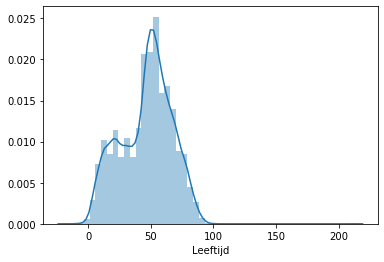

In [104]:
sns.distplot(dataset5.Leeftijd)

In [106]:
dataset5.describe()

,Geslacht,Oogmetingen/Sfr ver,Oogmetingen/Cyl ver,Oogmetingen/As ver,Oogmetingen/Add,Oogmetingen/Sfr dicht,Oogmetingen/Cyl dicht,Oogmetingen/As dicht,Oogmetingen/Sfr ver.1,Oogmetingen/Cyl ver.1,Oogmetingen/As ver.1,Oogmetingen/Add.1,Oogmetingen/Sfr dicht.1,Oogmetingen/Cyl dicht.1,Oogmetingen/As dicht.1,Leeftijd
count,57270.000000,57270.000000,57270.000000,57270.000000,57270.000000,57270.000000,57270.000000,57270.000000,57270.000000,57270.000000,57270.000000,57270.000000,57270.000000,57270.000000,57270.000000,57270.000000
mean,0.438624,2.431578,-0.269443,43.845574,0.613259,1.618496,-0.129287,21.306216,1.844670,-0.272903,41.839986,0.614456,1.569838,-0.123917,20.524795,46.469670
std,0.506118,51.182993,0.778774,59.854888,1.048895,6.206479,0.533275,54.082257,45.422109,0.789239,57.836249,1.049578,1.926614,0.648993,46.167987,20.390378
min,0.000000,-26.000000,-7.000000,0.000000,-0.750000,-22.000000,-8.000000,0.000000,-27.750000,-8.000000,0.000000,-0.750000,-23.500000,-6.500000,0.000000,-17.000000
25%,0.000000,-1.250000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.250000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000
50%,0.000000,0.000000,0.000000,10.000000,0.000000,1.250000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.250000,0.000000,0.000000,49.000000
75%,1.000000,1.000000,0.000000,90.000000,1.500000,2.750000,0.000000,0.000000,1.000000,0.000000,90.000000,1.500000,2.750000,0.000000,0.000000,61.000000
max,2.000000,999.990000,6.000000,180.000000,8.500000,999.990000,20.000000,6280.000000,999.990000,20.000000,180.000000,6.250000,27.250000,90.000000,225.000000,212.000000
